In [138]:
import math

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np


In [139]:
np.random.seed(1337)


In [140]:
X_SIZE = 5
L = 100

BETA_LIST = (0.5, 1, 1, 1, 1, 1)

N_LIST = (
    [number for number in range(50, 100, 10)] +
    [number for number in range(100, 1100, 100)]
)


In [141]:
def generate_df(n: int, x_size: int = X_SIZE) -> np.array:
    return np.array([
        [np.random.normal(0, 1) for _ in range(x_size)]
        for _ in range(n)
    ])


def probability(x: list[float], b_list: list[float]) -> float:
    b_list = list(b_list)

    b0 = b_list.pop(0)

    exp_content = b0
    for i in range(len(x)):
        exp_content += b_list[i]*x[i]

    return 1 / (1 + math.exp(-exp_content))


def mse(beta_head: list[float], beta: list[float]) -> float:
    beta_head = np.array(beta_head)
    beta = np.array(beta)

    return np.mean((beta_head - beta)**2)


### 1. Fit logistic model and calculate the estimators of the coefficients β = (β1,...,β5). Repeat the experiment L = 100 times and compute the MSE

In [142]:
results: dict[int, list[float]] = {}

for n in N_LIST:
    results[n] = []
    for _ in range(L):
        df = generate_df(n)

        p_list = [
            probability(x, BETA_LIST)
            for x in df
        ]

        y_list = [
            np.random.binomial(1, p)
            for p in p_list
        ]

        lf = LogisticRegression(penalty="l2", C=1000)
        lf.fit(df, y_list)

        beta_head = lf.coef_

        mse_value = mse(beta_head, BETA_LIST[1:])

        results[n].append(mse_value)


In [143]:
round_value = 3

for key in results:
    min_v = round(min(results[key]), round_value)
    avg_v = round(np.mean(results[key]), round_value)
    max_v = round(max(results[key]), round_value)

    print(f"{key:7} {min_v:7} {avg_v:7} {max_v:7}")


     50   0.014   5.128 233.857
     60   0.019   0.401   6.588
     70   0.012   0.352   5.122
     80   0.003   0.284   3.694
     90    0.01   0.206   2.006
    100   0.013   0.183    1.58
    200   0.007   0.074   0.589
    300   0.005   0.046   0.175
    400   0.004   0.026   0.083
    500   0.003   0.025   0.118
    600   0.002   0.017   0.072
    700   0.002   0.015   0.084
    800   0.001   0.013   0.064
    900   0.001   0.011   0.041
   1000   0.003   0.009   0.026


In [152]:
def draw(
        results: dict[int, list[float]],
        draw_first: bool = True,
        max_value: float = None
        ) -> None:

    if max_value is None:
        max_value = float("inf")

    dict_to_plot = {
        key: [value for value in values if value <= max_value]
        for key, values in results.items()
    }

    if not draw_first:
        min_key = min(list(results.keys()))
        del dict_to_plot[min_key]
    
    labels, data = zip(*dict_to_plot.items())

    plt.figure(figsize=(15, 10))

    plt.boxplot(
        data, patch_artist=True, labels=labels,
        boxprops={"facecolor": "lightblue", "color": "blue"},
        whiskerprops={"color": "green"},
        capprops={"color": "red"},
        medianprops={"color": "yellow"}
        )

    plt.title("Distribution of MSE values for 'n' with 100 repetitions")
    plt.xlabel("n")
    plt.ylabel("MSE")

    plt.show()


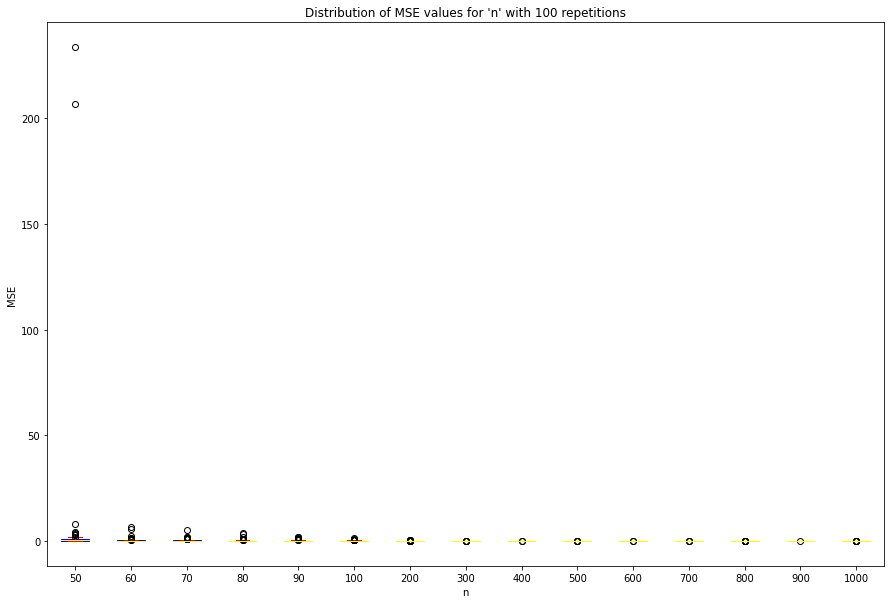

In [153]:
draw(results)


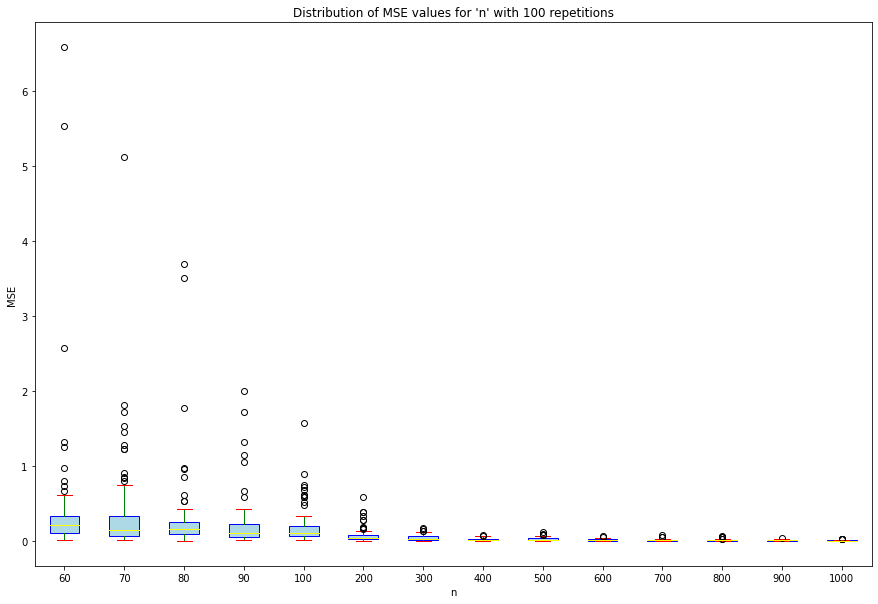

In [146]:
draw(results, draw_first=False)


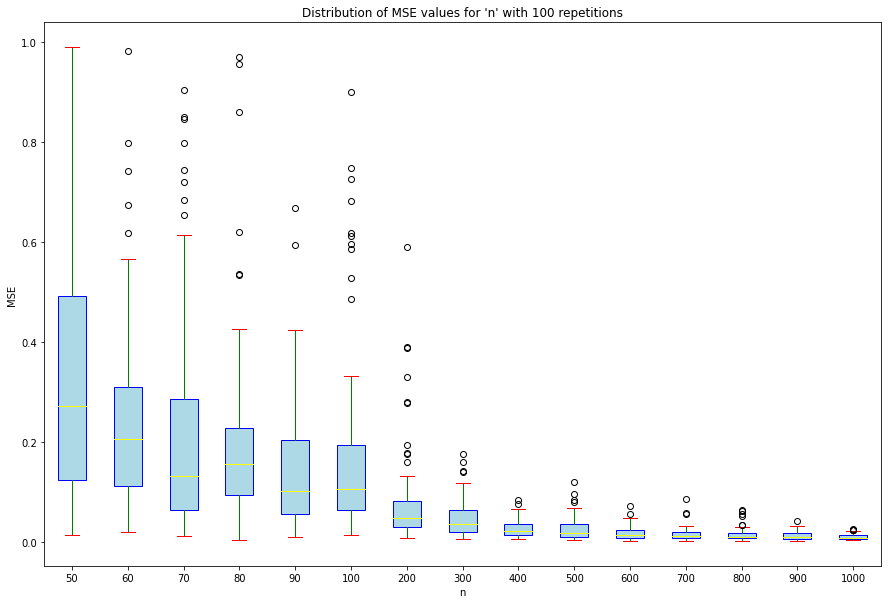

In [147]:
draw(results, max_value=1)
